# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Attar

Student name: Aidin

ID: 2048654

In [1]:
#load the required packages
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2048654
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 49 54 58 66 60 68 64 55 63]


In [6]:
#function for plotting a image and printing the corresponding label
%matplotlib inline
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


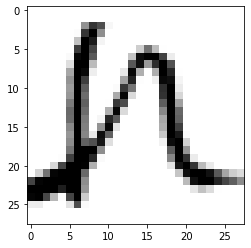

LABEL: 8
INPUT:


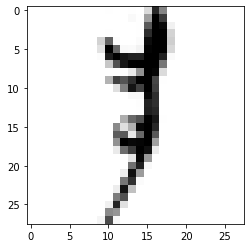

LABEL: 6
INPUT:


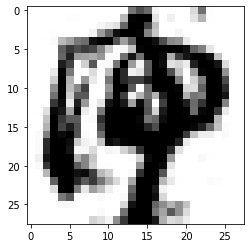

LABEL: 6
INPUT:


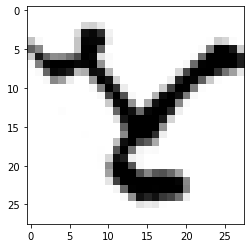

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

# ADD YOUR CODE
svc = SVC(kernel = 'linear')
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
LinResults = pd.DataFrame.from_dict(clf.cv_results_)
LinResults


RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.7349999999999999
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.080641,0.006841,0.019451,0.000902,0.01,{'C': 0.01},0.76,0.733333,0.726667,0.720000,0.735000,0.015184,1
1,0.082545,0.001722,0.018708,0.000506,0.1,{'C': 0.1},0.74,0.706667,0.700000,0.726667,0.718333,0.015899,2
2,0.082248,0.001126,0.019279,0.001340,1,{'C': 1},0.74,0.706667,0.700000,0.720000,0.716667,0.015275,3
3,0.082020,0.001250,0.018517,0.000146,10,{'C': 10},0.74,0.706667,0.700000,0.720000,0.716667,0.015275,3


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

# ADD YOUR CODE
svc = SVC(kernel = 'poly', degree=2)
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
QuadResults = pd.DataFrame.from_dict(clf.cv_results_)
QuadResults

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7766666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.114970,0.003860,0.022332,0.000867,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,9
1,0.091926,0.001751,0.018902,0.000334,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.806667,0.760000,0.773333,0.766667,0.776667,0.017951,1
2,0.097784,0.001130,0.018206,0.000096,0.01,1,"{'C': 0.01, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
3,0.106371,0.000577,0.020984,0.000084,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.473333,0.533333,0.513333,0.526667,0.511667,0.023274,8
4,0.097912,0.002530,0.019365,0.001963,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.773333,0.733333,0.746667,0.746667,0.750000,0.014530,7
5,0.096787,0.001542,0.018309,0.000197,0.1,1,"{'C': 0.1, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
6,0.093028,0.001429,0.018980,0.000281,1,0.01,"{'C': 1, 'gamma': 0.01}",0.806667,0.760000,0.773333,0.766667,0.776667,0.017951,1
7,0.096971,0.002216,0.018118,0.000160,1,0.1,"{'C': 1, 'gamma': 0.1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3
8,0.096605,0.001760,0.018141,0.000012,1,1,"{'C': 1, 'gamma': 1}",0.773333,0.726667,0.753333,0.753333,0.751667,0.016583,3


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

# ADD YOUR CODE
svc = SVC(kernel = 'poly', degree=degree)
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
CubResults = pd.DataFrame.from_dict(clf.cv_results_)
CubResults

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 1, 'gamma': 0.01}
Score with best parameters:
0.7383333333333333
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118854,0.008236,0.021957,0.000952,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,9
1,0.104958,0.000655,0.017921,0.000243,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.726667,0.686667,0.740000,0.686667,0.710000,0.023805,2
2,0.106045,0.003174,0.017921,0.000226,0.01,1,"{'C': 0.01, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
3,0.107614,0.000489,0.020729,0.000115,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.433333,0.453333,0.493333,0.540000,0.480000,0.040825,8
4,0.104567,0.000641,0.017877,0.000229,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.720000,0.673333,0.726667,0.680000,0.700000,0.023570,3
5,0.104467,0.000806,0.017939,0.000198,0.1,1,"{'C': 0.1, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
6,0.099142,0.001829,0.018801,0.000275,1,0.01,"{'C': 1, 'gamma': 0.01}",0.760000,0.740000,0.726667,0.726667,0.738333,0.013642,1
7,0.104570,0.000952,0.017864,0.000227,1,0.1,"{'C': 1, 'gamma': 0.1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4
8,0.104866,0.000838,0.017877,0.000181,1,1,"{'C': 1, 'gamma': 1}",0.720000,0.653333,0.726667,0.686667,0.696667,0.029250,4


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

# ADD YOUR CODE
svc = SVC(kernel = 'rbf')
clf = GridSearchCV(svc, param_grid=parameters, cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)

# using pandas
rbfResults = pd.DataFrame.from_dict(clf.cv_results_)
rbfResults


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8116666666666666
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121142,0.003228,0.058394,0.002203,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
1,0.121894,0.001231,0.057174,0.000068,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.173333,0.160000,0.186667,0.206667,0.181667,0.017240,7
2,0.127367,0.000409,0.057167,0.000068,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
3,0.126020,0.000281,0.057140,0.000170,0.1,1,"{'C': 0.1, 'gamma': 1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
4,0.105865,0.000410,0.056912,0.000119,1,0.001,"{'C': 1, 'gamma': 0.001}",0.613333,0.620000,0.606667,0.613333,0.613333,0.004714,6
5,0.121682,0.001216,0.055599,0.000446,1,0.01,"{'C': 1, 'gamma': 0.01}",0.800000,0.800000,0.773333,0.806667,0.795000,0.012802,3
6,0.130826,0.000599,0.057207,0.000131,1,0.1,"{'C': 1, 'gamma': 0.1}",0.120000,0.133333,0.120000,0.126667,0.125000,0.005528,10
7,0.127858,0.000256,0.057298,0.000381,1,1,"{'C': 1, 'gamma': 1}",0.113333,0.113333,0.113333,0.113333,0.113333,0.000000,11
8,0.082980,0.000732,0.051609,0.000416,10,0.001,"{'C': 10, 'gamma': 0.001}",0.786667,0.773333,0.733333,0.753333,0.761667,0.020207,4
9,0.123742,0.000299,0.055761,0.000718,10,0.01,"{'C': 10, 'gamma': 0.01}",0.820000,0.806667,0.806667,0.813333,0.811667,0.005528,1


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

We get the best results for the RBF kernel. ............................

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01) # USE YOUR OPTIMAL PARAMETERS

# ADD YOUR CODE
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error     = 1 - best_SVM.score(X_test,  y_test )

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.170500


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


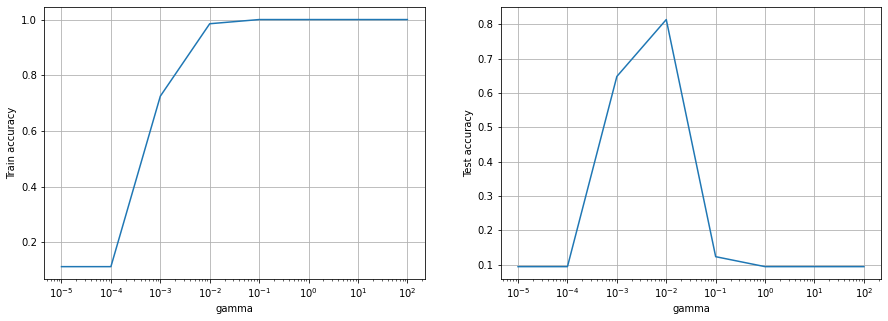

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for x in gamma_values:
    SVM = SVC(kernel='rbf', C=1, gamma=x)
    SVM.fit(X_train, y_train)
    train_acc_list.append(SVM.score(X_train, y_train))
    test_acc_list.append( SVM.score(X_test,  y_test ))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [193 207 200 193 218 208 200 197 194 190]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01) # USE YOUR OPTIMAL PARAMETERS

# ADD YOUR CODE
best_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error     = 1 - best_SVM.score(X_test,  y_test )

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.114103


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
'''

# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C=1e5)

# learn from training set
logreg.fit(X_train, y_train)

# predict on training set
Y_pred_training      = logreg.predict(X_train)

# print the error rate = fraction of misclassified samples
training_error  = 0

for i, j in zip(y_train, Y_pred_training):
    #print(i, j)
    if i != j:
        training_error += 1

training_error /= m_training

#predict on test set
Y_pred_test          = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
test_error      = 0

for i, j in zip(y_test, Y_pred_test):
    #print(i, j)
    if i != j:
        test_error += 1

test_error /= m_test


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)'''

'\n\n# ADD YOUR CODE\nlogreg = linear_model.LogisticRegression(C=1e5)\n\n# learn from training set\nlogreg.fit(X_train, y_train)\n\n# predict on training set\nY_pred_training      = logreg.predict(X_train)\n\n# print the error rate = fraction of misclassified samples\ntraining_error  = 0\n\nfor i, j in zip(y_train, Y_pred_training):\n    #print(i, j)\n    if i != j:\n        training_error += 1\n\ntraining_error /= m_training\n\n#predict on test set\nY_pred_test          = logreg.predict(X_test)\n\n#print the error rate = fraction of misclassified samples\ntest_error      = 0\n\nfor i, j in zip(y_test, Y_pred_test):\n    #print(i, j)\n    if i != j:\n        test_error += 1\n\ntest_error /= m_test\n\n\nprint ("Best logistic regression training error: %f" % training_error)\nprint ("Best logistic regression test error: %f" % test_error)'

In [18]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.267345


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [19]:
# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train, y_train)
training_error = 1-logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.000500
Best regularized logistic regression test error: 0.246759


/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.
Clothing???

In [20]:
LR_prediction = logreg.predict(X_test) # ADD CODE
SVM_prediction = best_SVM.predict(X_test) # ADD CODE

INPUT:


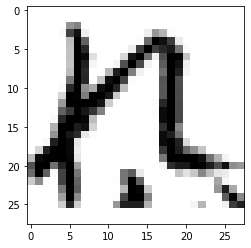

LABEL: 8
Index: 13
LR prediction:  4
SVM prediction:  8
INPUT:


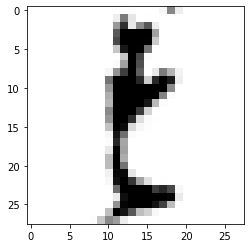

LABEL: 2
Index: 24
LR prediction:  6
SVM prediction:  2
INPUT:


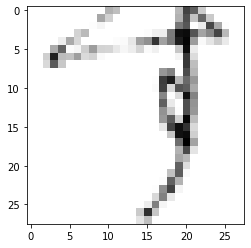

LABEL: 2
Index: 28
LR prediction:  1
SVM prediction:  2
INPUT:


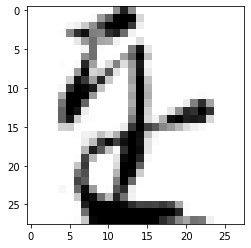

LABEL: 9
Index: 49
LR prediction:  2
SVM prediction:  9
INPUT:


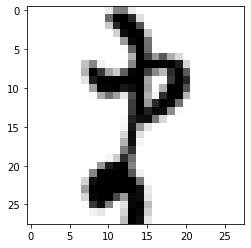

LABEL: 6
Index: 52
LR prediction:  1
SVM prediction:  6
INPUT:


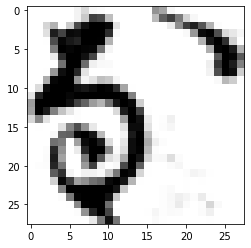

LABEL: 4
Index: 56
LR prediction:  0
SVM prediction:  4


In [21]:
counter = 0
for index, input, predictionSVM, predictionLR, label in zip(range(len(X_test)), X_test, SVM_prediction, LR_prediction, y_test):
    if predictionLR != label and predictionSVM == label:
        #print('input,',input, ', has been classified as', predictionLR, 'by the Logistic Regression and should be', label)
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("LR prediction: ", LR_prediction[index])
        print("SVM prediction: ", SVM_prediction[index])
        counter += 1
    if counter > 5:
        break


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label.
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5807 5793 5800 5807 5782 5792 5800 5803 5806 5810]

 Confusion matrix SVM  
 
 [[5412   13    4   12  115   64   10  111   31   35]
 [  13 5130   81   39  114   16  168    4   71  157]
 [   0  130 4697  145   59   21  445   23  189   91]
 [  12   54  110 5346   68   68   31   53   49   16]
 [ 155  154   94   53 5038   11   87   32   76   82]
 [  47   97  145  165   78 5109   42   22   63   24]
 [  16   90  253   59  151   15 5110   57   33   16]
 [  42   19   60   31  194   26   56 5287   48   40]
 [  45  180   63   78   34   41  153    7 5174   31]
 [  25  195  158   46  185    6   25   22   69 5079]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.02 0.01 0.   0.02 0.01 0.01]
 [0.   0.89 0.01 0.01 0.02 0.   0.03 0.   0.01 0.03]
 [0.   0.02 0.81 0.03 0.01 0.   0.08 0.   0.03 0.02]
 [0.   0.01 0.02 0.92 0.01 0.01 0.01 0.01 0.01 0.  ]
 [0.03 0.03 0.02 0.01 0.87 0.   0.02 0.01 0.01 0.01]
 [0.01 0.02 0.03 0.03 0.01 0.88 0.01 0.   0.0

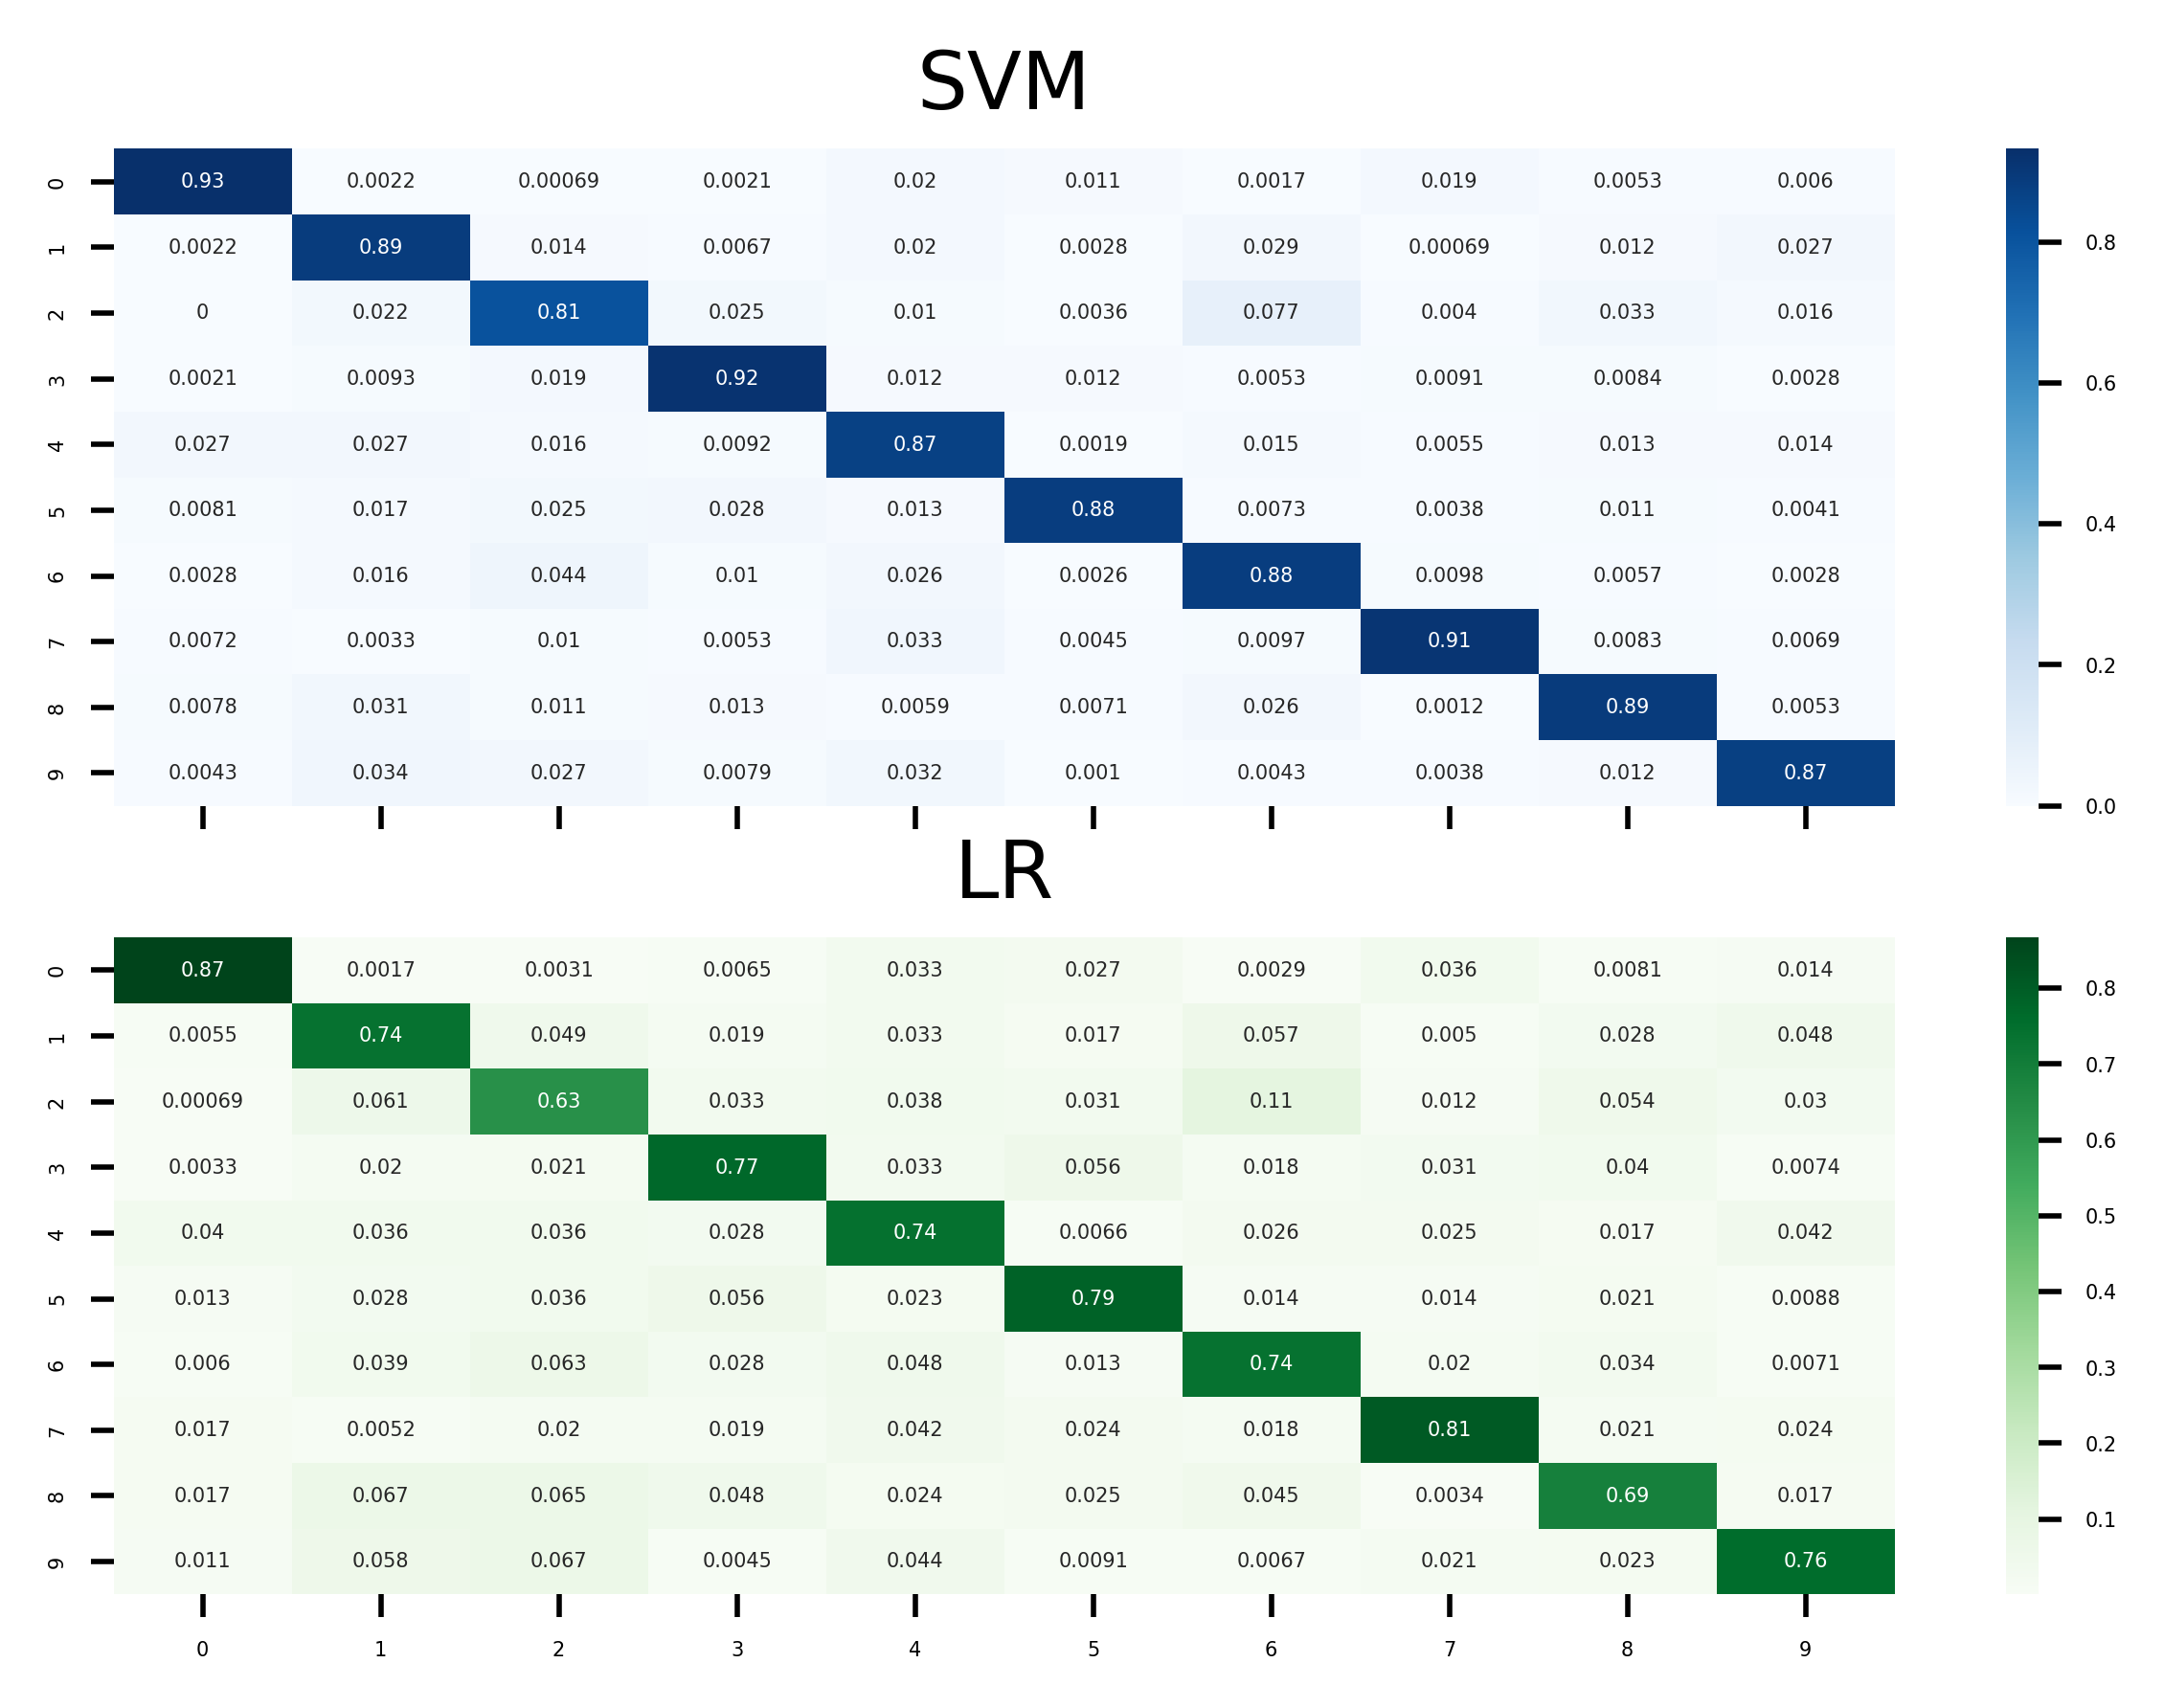

In [23]:
import seaborn as sn

fig, axs = plt.subplots(nrows = 2, ncols = 1, sharey=True, sharex=True, dpi = 500)
plt.rcParams['font.size'] = '3'
axs[0].tick_params(axis='both', labelsize=3)
axs[1].tick_params(axis='both', labelsize=3)
axs[0].title.set_text('SVM')
axs[1].title.set_text('LR')

df_cm = pd.DataFrame(confusion_SVM/counts[:,None], index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Blues", ax = axs[0])

df_cm = pd.DataFrame(confusion_LR/counts[:,None], index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greens", ax = axs[1])

plt.show()


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
